# Cabinet Start-Up Procedure

1. Turn on cabinet power in back of cabinet
2. Turn on sensor power (24 Volts). The sensor power inputs are labeled.
3. Compile code to AMDC
4. Turn on power to DC bus of cabinet.
5. Run Jupyter Notebook. 

Import neccessary modules

In [1]:
amdc.disconnect()

NameError: name 'amdc' is not defined

In [4]:
from Cabinet_Test import cmd
import sys
sys.path.append(r'..\AMDC-Firmware\scripts')
from AMDC import AMDC
amdc = AMDC(port = 'COM13', cmdEcho = True, printOutput=True)
Vdc = 50
cmd = cmd(Vdc, amdc, debug = False) 

	> cabinet setup 50.00000
['cabinet setup 50.00000', 'SUCCESS']
	> cabinet init_cb
['cabinet init_cb', 'FAILURE']


In [5]:
cmd.BIM_init()
cmd.BIM_set_Vdc(50)
cmd.BIM_enable_ctrl()
cmd.BIM_enable_vctrl()
#cmd.BIM_enable_levctrl()
cmd.enable_pwm()
cmd.twin_enable_log()

	> BIM init
['BIM initENC:\tSetting pulses per rev bits = 10...', '', 'SUCCESS']
	> BIM set_vdc 50.000000
['BIM set_vdc 50.000000', 'SUCCESS']
	> BIM enable_ctrl
['BIM enable_ctrl', 'SUCCESS']
	> BIM enable_vctrl
['BIM enable_vctrl', 'SUCCESS']
	> hw pwm on
['hw pwm on', 'SUCCESS']
	> twin enable_log
['twin enable_log', 'SUCCESS']


In [48]:
cmd.BIM_set_w(1)

	> BIM set_w 1.000000
['BIM set_w 1.000000', 'SUCCESS']


In [6]:
cmd.BIM_set_id(3)

	> BIM set_id 3.000000
['BIM set_id 3.000000', 'SUCCESS']


In [3]:
cmd.disable_pwm()

	> hw pwm off
['hw pwm off', 'SUCCESS']


In [32]:
amdc.disconnect()
#amdc.connect()

## Logging


In [7]:
import matplotlib

In [8]:
import time
import pathlib as pl
import sys
repo_dir = '..'                                      # CHANGE THIS TO YOUR REPO DIRECTORY
repo_dir = pl.Path(repo_dir)

from AMDC_Logger import AMDC_Logger, find_mapfile

In [9]:
mapfile_path = find_mapfile(repo_dir)
logger = AMDC_Logger(AMDC = amdc, mapfile = mapfile_path)
logger.sync()

# View which variables are logged
logger.info()

	> log info


In [ ]:
logger.unregister_all()
#logger.register('Ia1_a Ia1_b Ia1_c Ib1_a Ib1_b Ib1_c Ia2_a Ia2_b Ia2_c Ib2_a Ib2_b Ib2_c', samples_per_sec = 1000, var_type = 'double')
logger.register('theta_rm wrm wsl theta_e we Itq_d_ref Itq_q_ref Itq_d Itq_q', samples_per_sec = 1000, var_type = 'double')


# View which variables are logged
logger.info()

###################   COLLECT DATA   ####################
# Clear the logger, then record data
logger.clear_all()
logger.start()


SerialException: Attempting to use a port that is not open

In [69]:

#DATA IS BEING RECORDED
time.sleep(1)

logger.stop()


	> log stop
['log stop', 'SUCCESS']


	> log dump bin 0
Dumping: LOG_theta_rm
Dump took: 16.151  sec
Dump rate: 1937.151  sps
Num samples: 31287 

	> log dump bin 1
Dumping: LOG_wrm
Dump took: 16.008  sec
Dump rate: 1954.445  sps
Num samples: 31287 

	> log dump bin 2
Dumping: LOG_wsl
Dump took: 15.980  sec
Dump rate: 1957.874  sps
Num samples: 31287 

	> log dump bin 3
Dumping: LOG_theta_e
Dump took: 16.170  sec
Dump rate: 1934.925  sps
Num samples: 31287 

	> log dump bin 4
Dumping: LOG_we
Dump took: 16.146  sec
Dump rate: 1937.756  sps
Num samples: 31287 

	> log dump bin 5
Dumping: LOG_Itq_d_ref
Dump took: 16.049  sec
Dump rate: 1949.526  sps
Num samples: 31287 

	> log dump bin 6
Dumping: LOG_Itq_q_ref
Dump took: 16.044  sec
Dump rate: 1950.108  sps
Num samples: 31287 

	> log dump bin 7
Dumping: LOG_Itq_d
Dump took: 16.091  sec
Dump rate: 1944.401  sps
Num samples: 31287 

	> log dump bin 8
Dumping: LOG_Itq_q
Dump took: 16.110  sec
Dump rate: 1942.078  sps
Num samples: 31287 



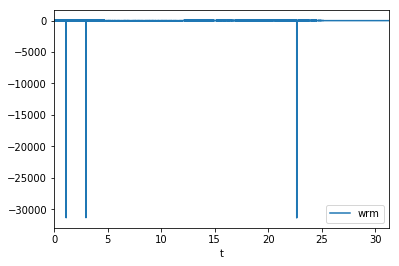

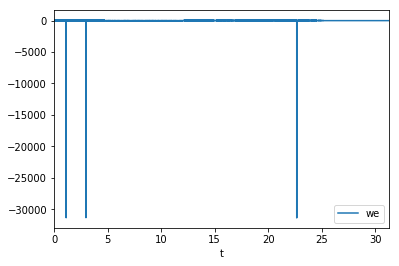

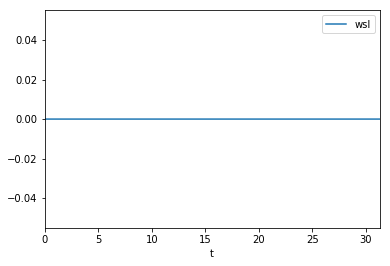

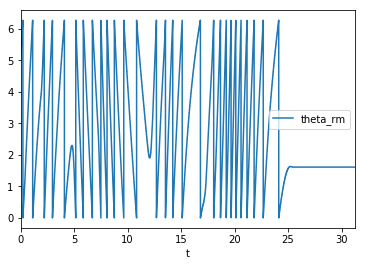

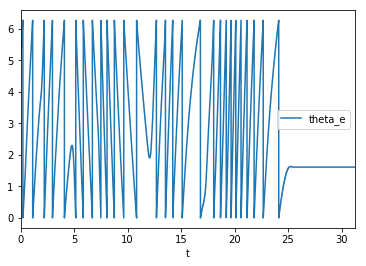

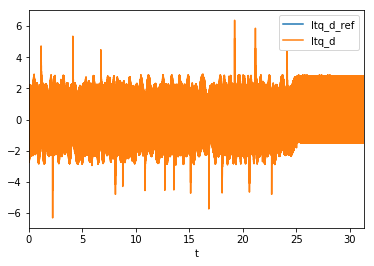

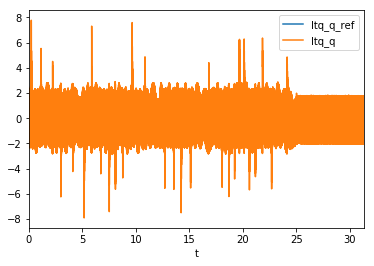

In [70]:

####################   DUMP DATA AND PLOT   ####################
data = logger.dump(file = 'BIM_data_pos.csv')
#data
data.filter(regex="^wrm$").plot()
data.filter(regex="^we$").plot()
data.filter(regex="^wsl$").plot()
data.filter(regex="^theta_rm$").plot()
data.filter(regex="^theta_e$").plot()
data.filter(regex="^Itq_d_ref|Itq_d$").plot()
data.filter(regex="^Itq_q_ref|Itq_q$").plot()


In [ ]:
logger.unregister_all()
logger.register('Iabc1_a Iabc1_b Iabc1_c', samples_per_sec = 1000, var_type = 'double')

# View which variables are logged
logger.info()

logger.clear_all()
logger.start()

# DATA IS BEING RECORDED
#time.sleep(1)

logger.stop()

data = logger.dump(file = 'test_data_Iabc.csv')
#data

data.filter(regex="^Iabc1_a|Iabc1_b|Iabc1_c$").plot()

	> log unreg 0
['log unreg 0', 'SUCCESS']
	> log unreg 1
['log unreg 1', 'SUCCESS']
	> log unreg 2
['log unreg 2', 'SUCCESS']
	> log unreg 3
['log unreg 3', 'SUCCESS']
	> log unreg 4
['log unreg 4', 'SUCCESS']
	> log reg 0 LOG_Itq_d_ref 1229376 1000 double
['log reg 0 LOG_Itq_d_ref 1229376 1000 double', 'SUCCESS']
	> log reg 1 LOG_Itq_q_ref 1229384 1000 double
['log reg 1 LOG_Itq_q_ref 1229384 1000 double', 'SUCCESS']
	> log reg 2 LOG_Itq_d 1229408 1000 double
['log reg 2 LOG_Itq_d 1229408 1000 double', 'SUCCESS']
	> log reg 3 LOG_Itq_q 1229416 1000 double
['log reg 3 LOG_Itq_q 1229416 1000 double', 'SUCCESS']
	> log info
###################   AMDC LOGGER INFO   ###################

Variable Name:      Index:         Type:         Sample Rate [Hz]:    Number of Samples:
LOG_Itq_d_ref         0            double              1000.0                0       
LOG_Itq_q_ref         1            double              1000.0                0       
LOG_Itq_d             2            double      

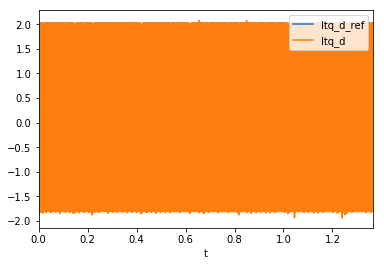

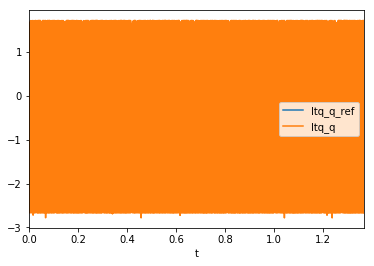

In [67]:
logger.unregister_all()
#logger.register('Itq_d_ref Itq_q_ref Itq_d Itq_q Is1_d_ref Is1_q_ref Is1_d Is1_q Is2_d_ref Is2_q_ref Is2_d Is2_q', samples_per_sec = 1000, var_type = 'double')
logger.register('Itq_d_ref Itq_q_ref Itq_d Itq_q', samples_per_sec = 1000, var_type = 'double')
# View which variables are logged
logger.info()

logger.clear_all()
logger.start()
time.sleep(1)
logger.stop()

data = logger.dump(file = 'BIM_data_Idq.csv')
#data

data.filter(regex="^Itq_d_ref|Itq_d$").plot()
data.filter(regex="^Itq_q_ref|Itq_q$").plot()
#data.filter(regex="^Te_ref$").plot()

In [ ]:
data.filter(regex="^Ib1_a|Ib1_b|Ib1_c$").plot()

In [ ]:
data.filter(regex="^Iabc2_a|Iabc2_b|Iabc2_c$").plot()

In [ ]:
data.filter(regex="^Iabc3_a|Iabc3_b|Iabc3_c$").plot()

In [ ]:
logger.unregister_all()
logger.register('vabc1_a vabc1_b vabc1_c', samples_per_sec = 1000, var_type = 'double')

# View which variables are logged
logger.info()

logger.clear_all()
logger.start()

# DATA IS BEING RECORDED
time.sleep(1)

logger.stop()

data = logger.dump(file = 'test_data.csv')
data

data.filter(regex="^vabc1_a|vabc1_b|vabc1_c$").plot()

In [ ]:

data = logger.dump(file = 'BIM_data.csv')
data


In [ ]:
data.filter(regex="^Itq_d_ref|Itq_q_ref|Itq_d$|Itq_q").plot()
#data.filter(regex="^Is1_d_ref|Is1_q_ref|Is1_d|Is1_q$").plot()
#data.filter(regex="^Is2_d_ref|Is2_q_ref|Is2_d|Is2_q$").plot()

In [ ]:
logger.unregister_all()
logger.register('Is1_d_ref Is1_q_ref Is1_d Is1_q', samples_per_sec = 1000, var_type = 'double')

# View which variables are logged
logger.info()

logger.clear_all()
logger.start()

# DATA IS BEING RECORDED
time.sleep(1)

logger.stop()


In [ ]:
#data = logger.dump(file = 'test_data.csv')
#data
data.filter(regex="^Is1_d_ref|Is1_q_ref|Is1_d|Is1_q$").plot()

In [ ]:
logger.unregister_all()
logger.register('Is2_d_ref Is2_q_ref Is2_d Is2_q', samples_per_sec = 1000, var_type = 'double')

# View which variables are logged
logger.info()

logger.clear_all()
logger.start()

# DATA IS BEING RECORDED
time.sleep(1)

logger.stop()

data = logger.dump(file = 'test_data.csv')
data

data.filter(regex="^Is2_d_ref|Is2_q_ref|Is2_d|Is2_q$").plot()

In [ ]:

logger.unregister_all()
logger.register('v_tq_d v_tq_q', samples_per_sec = 1000, var_type = 'double')

# View which variables are logged
logger.info()

logger.clear_all()
logger.start()

# DATA IS BEING RECORDED
time.sleep(1)

logger.stop()

data = logger.dump(file = 'test_data.csv')
data

data.filter(regex="^v_tq_d|v_tq_q$").plot()

In [ ]:
logger.unregister_all()
logger.register('we_tq', samples_per_sec = 1000, var_type = 'double')

# View which variables are logged
logger.info()

logger.clear_all()
logger.start()

# DATA IS BEING RECORDED
time.sleep(1)

logger.stop()

data = logger.dump(file = 'test_data.csv')
data

data.filter(regex="^we_tq$").plot()